# Main questions to be addressed
**What are the main factors that drive employee churn? Do they make sense? Explain your findings.**
The main factors appear to be the salary.

**What might you be able to do for the company to address employee Churn, what would be follow-up actions?**


**If you could add to this data set just one variable that could help explain employee churn, what would that be?**
Employee satisfaction regarding the job (if possible, obtained via survey) will greatly help improving the performance of the model.

Your output should be in the form a a jupyter notebook and pdf output of a jupyter notebook in which you specify your results and how you got them.

## data
The table is:

"employee_retention" - comprehensive information about employees. Columns:

employee_id : id of the employee. Unique by employee per company

company_id : company id.

dept : employee department

seniority : number of yrs of work experience when hired

salary: average yearly salary of the employee during her tenure within the company

join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13

quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)

# Design
I implement supervised learning using numeric (salary, seniority, duration of work = leaving date - join date), join_date) and categorical features (company, department) to predict the quit date of an employee using train-test split of the given data. To address the colinearity of numeric features, I calculate the correlation matrix to see if any of the two variables are strongly correlated.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
from dateutil.parser import parse

In [4]:
emp = pd.read_csv('../employee_retention.csv',index_col = 0)
emp.head(100)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,05.17.2011,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaN
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28
7,702479.0,7,data_science,7,140000.0,12.27.2011,2013-08-30
8,545690.0,10,data_science,16,238000.0,12.23.2013,NaN
9,622587.0,5,sales,28,166000.0,2015-07-01,NaN


In [5]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34702 entries, 0 to 34701
Data columns (total 7 columns):
employee_id    34702 non-null float64
company_id     34702 non-null int64
dept           34702 non-null object
seniority      34702 non-null int64
salary         34463 non-null float64
join_date      34702 non-null object
quit_date      23510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


In [6]:
#emp_quit = emp.dropna(subset=['quit_date'])

In [7]:
#emp_quit['join_date']  = pd.to_datetime(emp_quit['join_date'])
#emp_quit['quit_date']  = pd.to_datetime(emp_quit['quit_date'])

In [8]:
emp['join_date']  = pd.to_datetime(emp['join_date'])
emp['quit_date']  = pd.to_datetime(emp['quit_date'])

In [9]:
emp.loc[emp['quit_date'].isnull(),'cont'] = 1
emp.loc[emp['quit_date'].notnull(),'cont']=0
emp['cont']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        1.0
6        0.0
7        0.0
8        1.0
9        1.0
10       1.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       1.0
22       0.0
23       0.0
24       0.0
25       1.0
26       0.0
27       1.0
28       0.0
29       1.0
        ... 
34672    1.0
34673    1.0
34674    0.0
34675    1.0
34676    0.0
34677    0.0
34678    0.0
34679    1.0
34680    0.0
34681    0.0
34682    1.0
34683    0.0
34684    1.0
34685    1.0
34686    0.0
34687    0.0
34688    0.0
34689    0.0
34690    0.0
34691    1.0
34692    0.0
34693    0.0
34694    1.0
34695    0.0
34696    1.0
34697    0.0
34698    0.0
34699    0.0
34700    0.0
34701    0.0
Name: cont, Length: 34702, dtype: float64

In [10]:
emp['quit_date'] = emp['quit_date'].fillna(pd.Timestamp('20151213'))

Although the NaN values in quit_date means that the people indicates that they are still working for the company, for our purpose (predicting the quit time) the data is not very useful and only hurts the statistics of the prediction, thus I remove them from the sample (=emp_quit)

In [11]:
#emp_quit['quit_date']

In [12]:
#emp_quit['duration'] = (emp_quit['quit_date'] - emp_quit['join_date']).dt.days

In [13]:
emp['duration'] = (emp['quit_date'] - emp['join_date']).dt.days

In [14]:
#emp['duration'].loc[emp['cont']==0]

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


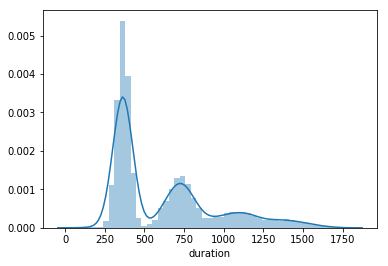

In [15]:
sns.distplot(emp['duration'].loc[(emp['dept']!='temp_contractor') & (emp['cont']==0)])
# For people who quit, the distribution of duration can be modeled as 4 gaussians: 
# a year, two years, three and four. Very pretty!

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


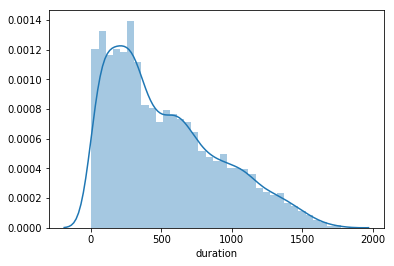

In [16]:
sns.distplot(emp['duration'].loc[(emp['dept']!='temp_contractor') & (emp['cont']==1)])
# For people who are continuing to working at the company, it's hard to model since "they have not quit". 
# we can see what is the difference in population here maybe.

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


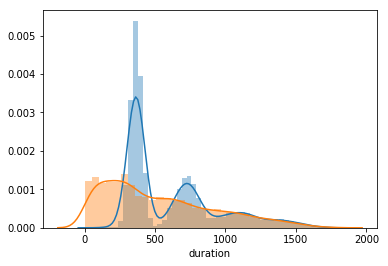

In [17]:
fig, ax = plt.subplots()
sns.distplot(emp['duration'].loc[(emp['dept']!='temp_contractor') & (emp['cont']==0)],ax=ax)
sns.distplot(emp['duration'].loc[(emp['dept']!='temp_contractor') & (emp['cont']==1)], ax=ax)

In [18]:
emp.describe()
# There are 35k employee information in the data 
# Where 24k are ones who quit, 11k are continuing to work
# we need to see what makes the population difference

,employee_id,company_id,seniority,salary,cont,duration
count,3.470200e+04,34702.000000,34702.000000,34463.000000,34702.000000,34702.000000
mean,6.466667e+05,4.023370,10.056625,100280.585004,0.322517,434.753905
std,3.337653e+05,2.911201,9.355505,87322.502536,0.467447,375.749013
min,3.600000e+01,1.000000,0.000000,5000.000000,0.000000,3.000000
25%,3.529228e+05,1.000000,0.000000,9302.000000,0.000000,90.000000
50%,7.063230e+05,3.000000,8.000000,88000.000000,0.000000,349.000000
75%,1.001324e+06,6.000000,18.000000,158000.000000,1.000000,676.000000
max,1.009999e+06,12.000000,99.000000,408000.000000,1.000000,1777.000000


In [19]:
emp['company_id'].unique()
# no missing company info, 12 companies

array([ 8,  3,  2,  1,  5,  7, 10,  6,  4,  9, 12, 11])

In [20]:
emp['quit_date'].loc[emp['dept']=='sales'].isnull().sum()
#len(emp.loc[emp['dept']=='design'])
# 11192, a lot of quit date is missing: about 30% of the data
# 602/1380 design
# 2251/4613 engineer
# 1384/3167 marketing
# 4086/9180 customer service
# 1508/3190 DS
# 1361/3172 sales

0

In [21]:
emp['dept'].unique()
# by definition, temp_contractor will be temporary and thus should be removed from the data

array(['temp_contractor', 'design', 'engineer', 'marketing',
       'customer_service', 'data_science', 'sales'], dtype=object)

In [22]:
emp['seniority'].unique()
emp = emp.loc[emp['seniority']<50]
# Former work experiences (in years): are 98 & 99 reasonable values? no. Let's take a look at those datapoints
# there are only two, and it does not make sense to include those datapoints in the analysis, thus we decide
# to drop them

In [23]:
emp['salary'].isnull().sum()

239

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


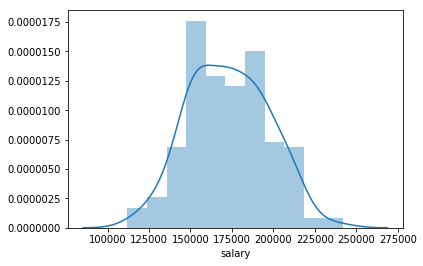

In [24]:
#empnan=emp[~np.isnan(emp)]
sns.distplot(emp.salary.dropna().loc[(emp['dept']=='engineer') & (emp['seniority']>5) & (emp['seniority']<7)])
# The salary seems to be distributed with largely three groups within a company. The seniority seems to be strongly correlated to it.

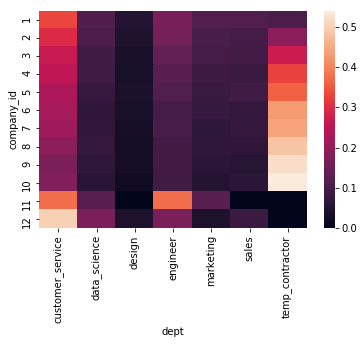

In [25]:
sns.heatmap(pd.crosstab(emp.company_id, emp.dept,normalize='index'))
# this shows that from company 10 to 1, they rely less on temporary contract. for example, company 10 is
# largely operated based on temporary contractors.
# There are so few design ppl...

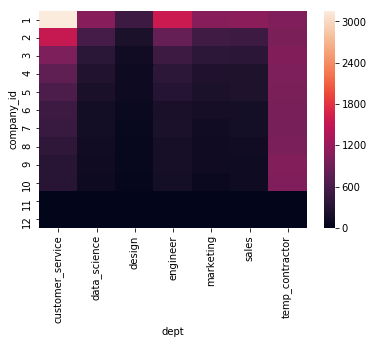

In [26]:
sns.heatmap(pd.crosstab(emp.company_id, emp.dept))
# this not-normalized crosstab shows that company size decreases as company_id gets higher: company1 is the largest company.
# except for 11 and 12: they are tiny companies.

In [27]:
len(emp.loc[emp['company_id']==12])

24

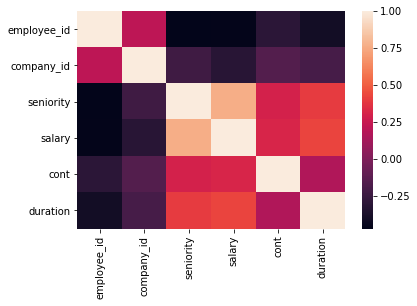

In [28]:
corr = emp.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#plt.show()

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


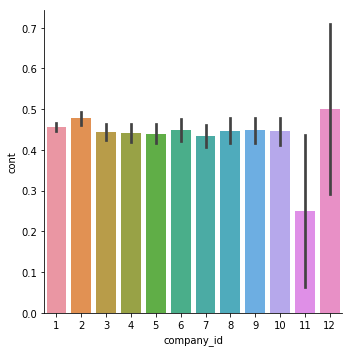

In [29]:
sns.catplot(x="company_id", y="cont", kind="bar", data=emp.loc[emp['dept']!='temp_contractor'])
# before we proceed, we check if different companies show different retention rate, and it appears that
# it is not the quite the case overall (except for companies 11 and 12 which are very small to provide 
# statistical significance, 
# and company 2 is marginally inside the error bar but it appears that they are more or less identical
# in terms of staying rate.

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


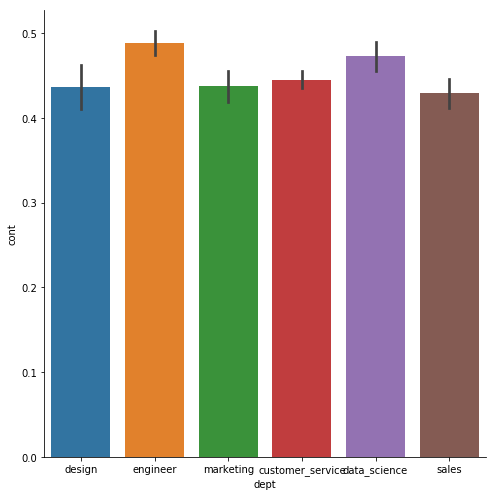

In [30]:
sns.catplot(x="dept", y="cont", kind="bar", data=emp.loc[emp['dept']!='temp_contractor'],size=7,aspect=1)
# depending on where the employee is working, there seems to be small tendency in continuation of job:
# for example, engineer/data science people tend to stay longer than sales, although the significance is
# marginal. we can one-hot encode the dept colum and keep it for prediction

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


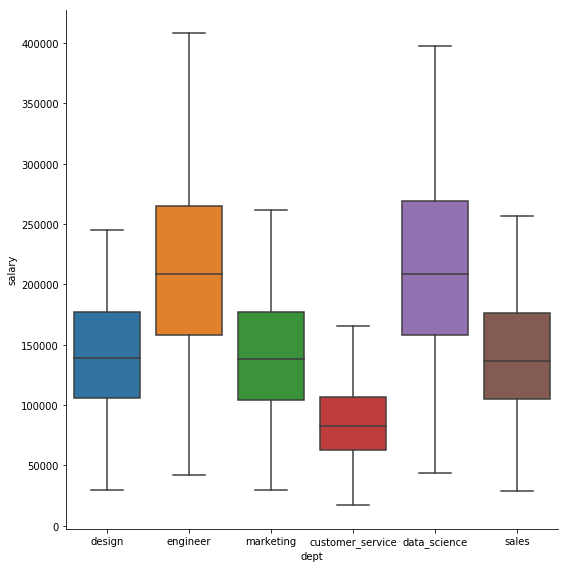

In [31]:
sns.catplot(x="dept", y="salary", kind="box", data=emp.loc[emp['dept']!='temp_contractor'],size=8,aspect=1)

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


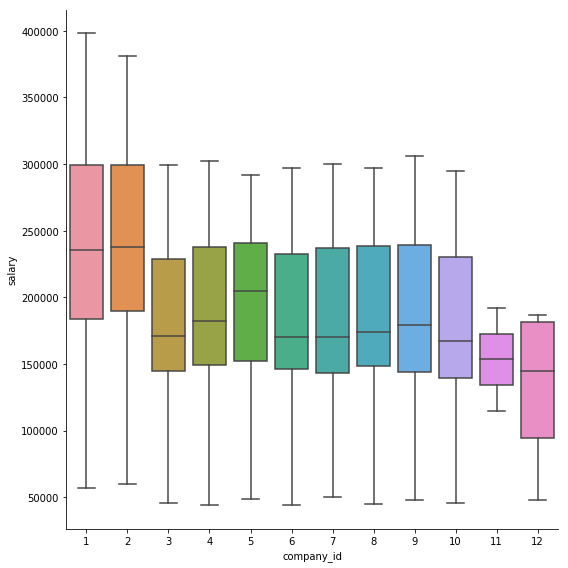

In [32]:
sns.catplot(x="company_id", y="salary", kind="box", data=emp.loc[emp['dept']=='data_science'],size=8,aspect=1)

In [33]:
df = emp.copy()
df.loc[df['seniority']<5,'seniority_cat']=1
df.loc[(5<=df['seniority'])&(df['seniority']<15),'seniority_cat']=2
df.loc[(15<=df['seniority']),'seniority_cat']=3

In [34]:
#df["seniority"] = df["seniority"].astype('category')
df["company_id"] = df["company_id"].astype('category')

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


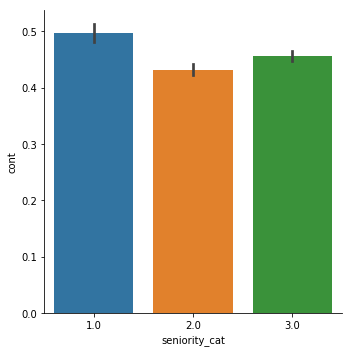

In [35]:
sns.catplot(x="seniority_cat", y="cont", kind="bar", data=df.loc[df['dept']!='temp_contractor'],size=5,aspect=1)

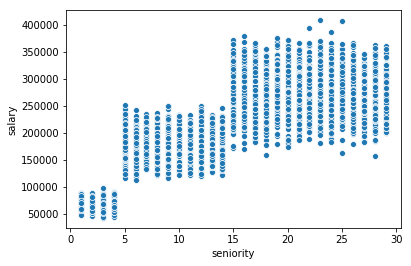

In [36]:
# Hypothesis: jobs display more correlation between salary-seniority than others
sns.scatterplot(x='seniority',y='salary',data=emp.loc[emp['dept']=='engineer'])
# observation: all jobs are indeed like that, and that the cuts are 5 / 15 / 30 years prior to current work.
# once seniority is in a category (1,2,3), the salary does not vary significantly.
# thus we can encode seniority as categorical features, and use the average salary given job
# to fill in the missing salary value (although not many)


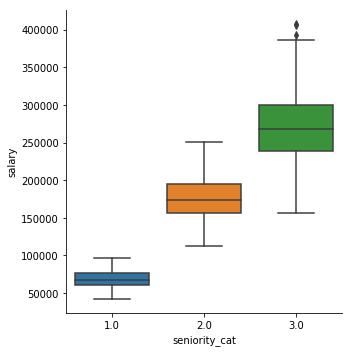

In [37]:
sns.catplot(x='seniority_cat',y='salary',kind='box',data=df.loc[df['dept']=='engineer'])
# categorizing seniority into three instead of previous experiences in years make the data cleaner

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


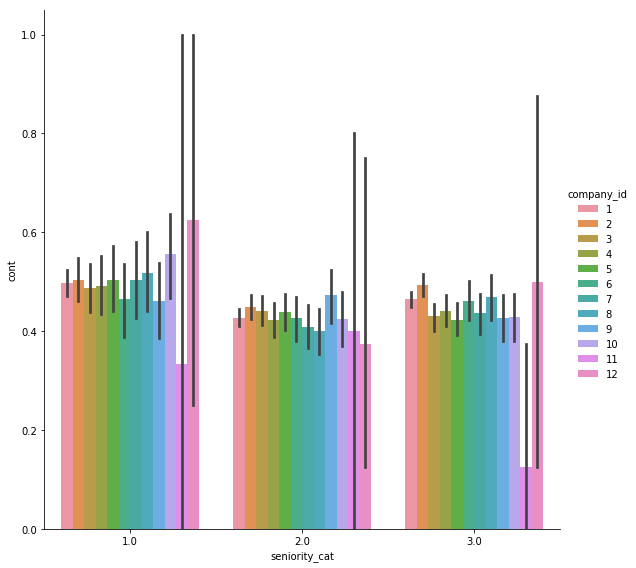

In [38]:
sns.catplot(x="seniority_cat", y="cont", kind="bar",hue='company_id', data=df.loc[df['dept']!='temp_contractor'],size=8,aspect=1)
# more senior people tend to stay at larger firm with higher salaries, while for the midium-sized firms
# they exhibit similar behavior

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


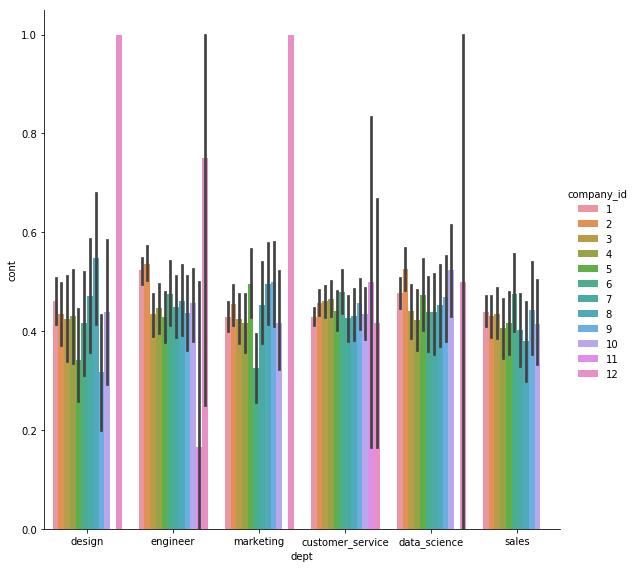

In [39]:
sns.catplot(x="dept", y="cont", kind="bar",hue='company_id', data=df.loc[df['dept']!='temp_contractor'],size=8,aspect=1)

In [40]:
# drop temp_contractor
df = df.loc[df['dept'] != 'temp_contractor']
df = df.drop(['employee_id'],axis=1)

In [41]:
df = df.dropna(subset=['salary'])

In [42]:
df.head(5)

,company_id,dept,seniority,salary,join_date,quit_date,cont,duration,seniority_cat
1,8,design,21,191000.0,2011-05-17,2012-03-16,0.0,304,3.0
2,3,design,9,90000.0,2012-03-26,2015-04-10,0.0,1110,2.0
3,2,engineer,20,298000.0,2013-04-08,2015-01-30,0.0,662,3.0
5,5,marketing,20,180000.0,2014-06-30,2015-12-13,1.0,531,3.0
6,3,customer_service,18,119000.0,2012-07-02,2014-03-28,0.0,634,3.0


In [43]:
grouped = df.groupby(['company_id','dept'])

In [44]:
print(grouped.mean())
print(grouped.std())

                             seniority         salary      cont    duration  \
company_id dept                                                               
1          customer_service  14.173218   90598.913391  0.427613  560.250240   
           data_science      14.472897  230817.757009  0.474766  627.201869   
           design            14.036660  150002.036660  0.460285  576.572301   
           engineer          13.915593  223950.386598  0.524485  608.849227   
           marketing         14.160149  151010.242086  0.429236  571.587523   
           sales             14.008249  151031.164070  0.439047  545.616865   
2          customer_service  14.344444   91958.169935  0.458824  560.652941   
           data_science      14.608541  234768.683274  0.528470  634.508897   
           design            14.587444  154556.053812  0.434978  628.430493   
           engineer          14.287105  227978.102190  0.537713  618.128954   
           marketing         13.945794  148885.98130

In [45]:
df['norm_salary_dept_comp']=df['salary'].groupby(['dept','company_id']).transform(lambda x: (x - x.mean()) / x.std())
#df['norm_salary_senior']=df['salary'].groupby(df['seniority']).transform(lambda x: (x - x.mean()) / x.std())
#df['norm_salary_company']=df['salary'].groupby(df['seniority']).transform(lambda x: (x - x.mean()) / x.std())

KeyError: 'dept'

In [ ]:
sns.catplot(x='cont',y='norm_salary_senior',kind='box',data=df)
# categorizing seniority into three instead of previous experiences in years make the data cleaner

In [46]:
df.head(5)

,company_id,dept,seniority,salary,join_date,quit_date,cont,duration,seniority_cat
1,8,design,21,191000.0,2011-05-17,2012-03-16,0.0,304,3.0
2,3,design,9,90000.0,2012-03-26,2015-04-10,0.0,1110,2.0
3,2,engineer,20,298000.0,2013-04-08,2015-01-30,0.0,662,3.0
5,5,marketing,20,180000.0,2014-06-30,2015-12-13,1.0,531,3.0
6,3,customer_service,18,119000.0,2012-07-02,2014-03-28,0.0,634,3.0


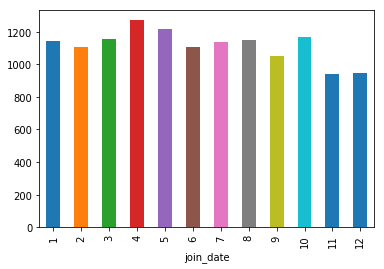

In [47]:
df['join_date'].loc[df['cont']==0].groupby([df["join_date"].dt.month]).count().plot(kind="bar")

In [48]:
df['join_month'] = df['join_date'].map(lambda x: x.month)
df["join_month"] = df["join_month"].astype('category')

In [49]:
df['join_year'] = df['join_date'].map(lambda x: x.year)
df["join_year"] = df["join_year"].astype('category')

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


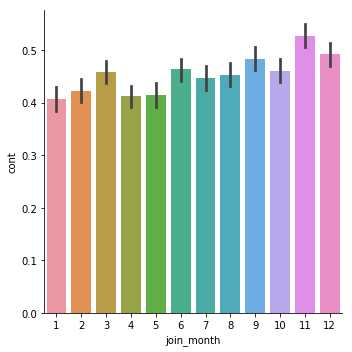

In [50]:
sns.catplot(x='join_month',y='cont',kind="bar",data=df,size=5, aspect=1)

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


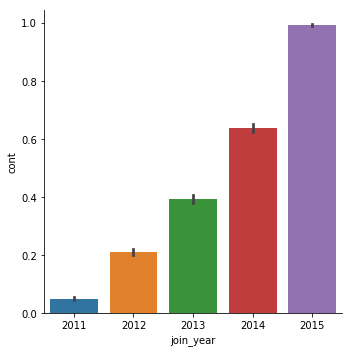

In [51]:
sns.catplot(x='join_year',y='cont',kind="bar",data=df,size=5, aspect=1)
# this is kinda trivial. People who recently joined are less likely to have left.
# I can look into people who have left and join year to see if there's difference in duration of stay.

From the above analysis, there are a few factors affecting the retention rate. First, the size of the company does seem to affect the retention, especially for employees in engineer and data science department. This may partially be through salary. Second, while the new employees (career less than 5 years) and the most senior employees (with career longer than 15 years) tend to stay, people with previous career of 5-15 years tend to stay the least.  

In [52]:
y = df['cont']
X = df.drop(['cont'],axis=1)

In [53]:
X=pd.get_dummies( data=X,columns =['dept'] )

In [54]:
X = X.drop(['join_date','quit_date','duration'],axis=1)

In [55]:
X.head()

,company_id,seniority,salary,seniority_cat,join_month,join_year,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
1,8,21,191000.0,3.0,5,2011,0,0,1,0,0,0
2,3,9,90000.0,2.0,3,2012,0,0,1,0,0,0
3,2,20,298000.0,3.0,4,2013,0,0,0,1,0,0
5,5,20,180000.0,3.0,6,2014,0,0,0,0,1,0
6,3,18,119000.0,3.0,7,2012,1,0,0,0,0,0


In [57]:
#X = X.drop(['dept_temp_contractor'],axis=1)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

let's use RF to perform classification to classify.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [61]:
rfc = RandomForestClassifier(n_estimators=500,max_depth=15)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(rfc.score(X_test,y_test))

             precision    recall  f1-score   support

        0.0       0.78      0.85      0.81      3271
        1.0       0.81      0.72      0.76      2845

avg / total       0.79      0.79      0.79      6116

[[2796  475]
 [ 795 2050]]
0.7923479398299542


In [83]:
#print(rfc.score(X_train,y_train))

ValueError: Number of features of the model must match the input. Model n_features is 12 and input n_features is 7 

Feature ranking:
1. feature 5 (0.582620)
2. feature 2 (0.153836)
3. feature 1 (0.088440)
4. feature 4 (0.077620)
5. feature 0 (0.063121)
6. feature 3 (0.006569)
7. feature 9 (0.005010)
8. feature 10 (0.004911)
9. feature 7 (0.004782)
10. feature 11 (0.004729)
11. feature 8 (0.004426)
12. feature 6 (0.003937)


(-1, 12)

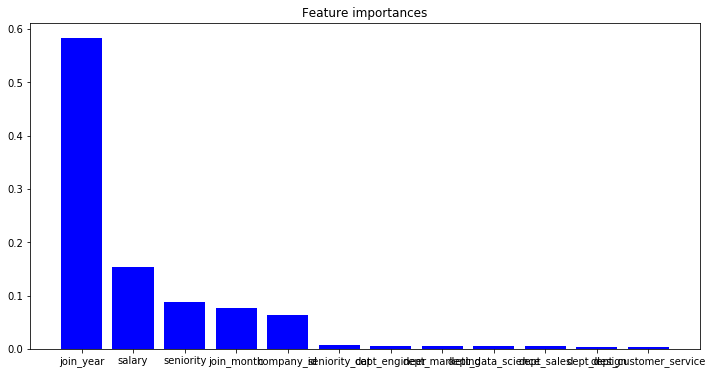

In [62]:
importances = rfc.feature_importances_
features = X.columns.values

std = np.std([rfc.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), indices)
plt.xticks(range(len(indices)), features[indices])
plt.xlim([-1, X.shape[1]])

In [63]:
from sklearn.svm import SVC

In [64]:
SVMmodel = SVC(class_weight='balanced')
SVMmodel.fit(X_train,y_train)
predictions = SVMmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(SVMmodel.score(X_test,y_test))

             precision    recall  f1-score   support

        0.0       0.70      0.70      0.70      3271
        1.0       0.65      0.65      0.65      2845

avg / total       0.68      0.68      0.68      6116

[[2280  991]
 [ 996 1849]]
0.6751144538914323


In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(logmodel.score(X_test,y_test))

             precision    recall  f1-score   support

        0.0       0.56      0.53      0.54      3271
        1.0       0.49      0.53      0.51      2845

avg / total       0.53      0.53      0.53      6116

[[1721 1550]
 [1346 1499]]
0.52648790058862


# Survival analysis using python lifelines package
We probably all have noticed that there is an intrinsic problem in the data: the 'stay' group is not providing the full information, as it is truncated at the current time. We treated it as a classification problem which is using partial information of them but the full analysis (assuming that the two groups have the same characteristics) should be more of a regression problem where we first estimate the duration of the stay given the features we think is important, and from the regression predict the churn at the current period.

This type of problem is known as survival analysis, and there's a python package, lifelines (https://lifelines.readthedocs.io/en/latest), which does the work for us (install it using Conda first). The key concepts are as follows.

## Survival function
Survival function $S(t) = Pr(T>t)$ defines the probability of not death (= employees staying) at time t, which is the observable from the data. However, again, this is a superposition truncated distribution of employees who is staying (in survival analysis, this type of data is called **right-censored**, as the information is truncated on the right side of the current time). 

## Hazard function
Hazard function gives the probability of death (employee churn in our case) to occur at time t. This can be expressed as $\lambda(t) = -\frac{S'(t)}{S(t)}$, which yields a simple solution<br>
$S(t) = exp(-\int^t_0 \lambda(x)dx)$.<br>

What Lifeline does is to estimate the survival function using various estimates, such as Kaplan-Meier (non-parametric, feature : duration), Cox model (parametric, multiplicative), Aalen's additive model (parametric, additive). Let's try to use this and see how the prediction changes.

In [67]:
df.loc[emp['quit_date'].isnull(),'quit'] = 0
df.loc[emp['quit_date'].notnull(),'quit']= 1

In [68]:
X_surv = df
#X_surv['dept'] = X_surv['dept'].map({'customer_service':0,'data_science':1,'design':2,'engineer':3,'marketing':4,'sales':5,'temp_contractor':6})

In [69]:
#X_surv = X_surv.drop(['join_date','join_month','quit_date'],axis=1)
X_surv['quit'] = X_surv['cont'].map({0:1,1:0})
X_surv = X_surv.drop(['cont','join_date','quit_date','dept','seniority'],axis=1)

In [70]:
X_surv.head()
X_surv['company_id']=X_surv["company_id"].astype('int64')
X_surv['join_year']=X_surv["join_year"].astype('int64')
X_surv['join_month']=X_surv["join_month"].astype('int64')

#X_surv['company_id'] = X_surv['company_id'].apply(lambda x: int(x))
X_surv.head()

,company_id,salary,duration,seniority_cat,join_month,join_year,quit
1,8,191000.0,304,3.0,5,2011,1
2,3,90000.0,1110,2.0,3,2012,1
3,2,298000.0,662,3.0,4,2013,1
5,5,180000.0,531,3.0,6,2014,0
6,3,119000.0,634,3.0,7,2012,1


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_surv, y, test_size=0.25, random_state=42)

Iteration 1: norm_delta = 0.19025, step_size = 0.95000, ll = -88439.62804, seconds_since_start = 0.6
Iteration 2: norm_delta = 0.01044, step_size = 0.95000, ll = -88361.89020, seconds_since_start = 1.1
Iteration 3: norm_delta = 0.00056, step_size = 0.95000, ll = -88361.51545, seconds_since_start = 1.7
Iteration 4: norm_delta = 0.00003, step_size = 0.95000, ll = -88361.51436, seconds_since_start = 2.2
Iteration 5: norm_delta = 0.00000, step_size = 0.95000, ll = -88361.51436, seconds_since_start = 2.8
Convergence completed after 5 iterations.
n=18345, number of events=10106

                 coef  exp(coef)  se(coef)        z      p  lower 0.95  upper 0.95     
company_id    -0.0038     0.9962    0.0037  -1.0149 0.3102     -0.0111      0.0035     
salary        -0.0000     1.0000    0.0000 -12.1323 0.0000     -0.0000     -0.0000  ***
seniority_cat  0.1707     1.1861    0.0181   9.4263 0.0000      0.1352      0.2061  ***
join_month    -0.0026     0.9974    0.0030  -0.8891 0.3740     -0.00

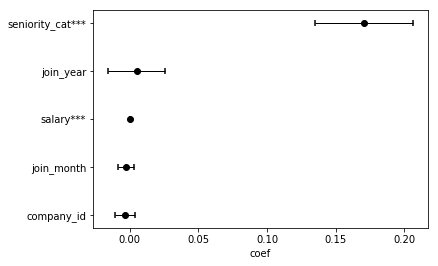

In [72]:
#from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(X_train, duration_col='duration', event_col='quit',show_progress=True)

cph.print_summary()
cph.plot()

In [73]:
#cph.plot_covariate_groups('dept', [ 0,1, 2, 3,4,5,6])

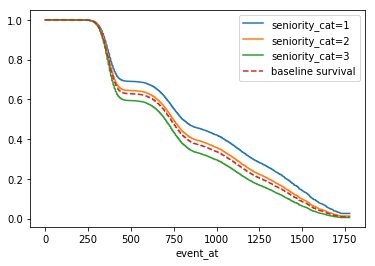

In [74]:
cph.plot_covariate_groups('seniority_cat', [ 1,2, 3])

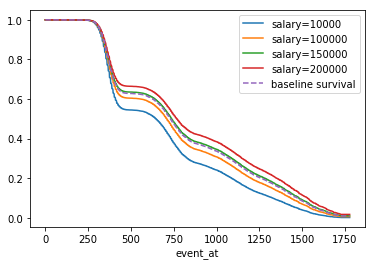

In [75]:
cph.plot_covariate_groups('salary', [ 10000, 100000, 150000, 200000])

In [76]:
y_pred = pd.DataFrame(cph.predict_expectation(X_test))

In [77]:
#y_pred.column=['prediction']
print(y_pred)

             0
14856  805.977
33180  828.705
26324  798.983
15961  759.763
27241  849.943
7899    880.35
3438   826.817
14734  912.887
32533  880.293
10805  848.456
11150   839.76
31928  771.881
1436   759.397
21053  793.326
11683  838.395
16427  833.846
14693  867.454
31695  823.701
22267  830.624
11536  748.739
23466  737.413
16393  834.061
21723  839.584
22986  768.499
29322   835.42
24129  770.944
5752   909.429
22580  916.514
32137  730.555
33834  815.507
...        ...
8672    788.48
4464   791.423
20073  853.013
27016  821.464
11257  897.739
16369  810.297
33778  870.715
4588   850.301
30908  906.301
26923  861.822
18519  816.975
7991   746.254
27854  833.636
21188  845.171
16726  753.298
21747  839.006
10395  783.496
31923  815.147
9741   832.976
12418  842.258
19035  738.054
1897    765.49
19130   808.04
4057   830.953
33696  816.848
16882  778.339
22841  811.764
31635  799.057
11980  841.252
18072  758.807

[6116 rows x 1 columns]


In [78]:
y_df = pd.DataFrame(y_pred)
y_quit = np.array(y_df.loc[X_test['quit']==1])
y_noquit = np.array(y_df.loc[X_test['quit']==0])
y_quit = [float(x) for [x] in y_quit]
y_noquit = [float(x) for [x] in y_noquit]


In [80]:
print(X_test['duration'].loc[X_test['quit']==1])

14856     305
33180     511
26324     662
15961     375
14734    1137
32533     722
10805     294
31928     389
1436      844
21053    1404
22267     319
11536     340
23466     338
21723     725
22986     351
29322     325
22580    1145
32137     382
12003     361
19168     319
28140     368
29320     347
12094     387
2447      648
20385     346
33041     326
32610     779
2155      388
31763     333
27180     347
         ... 
22298     291
31874     319
28763     332
2107      333
23319     332
30179     375
8920      780
796      1495
15929    1446
9231      722
29692     746
28517     655
9629      444
16867     375
8672      337
4464      310
20073     683
11257     382
16369    1068
4588      704
26923     774
7991      361
27854    1208
21188     319
16726     347
31923     361
19035     935
1897      270
4057      718
16882     779
Name: duration, Length: 3271, dtype: int64


In [81]:
y_df = pd.DataFrame(y_pred)
y_df.columns=['prediction']
y_df.head()
y_df.shape

(6116, 1)

/home/ijee/anaconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


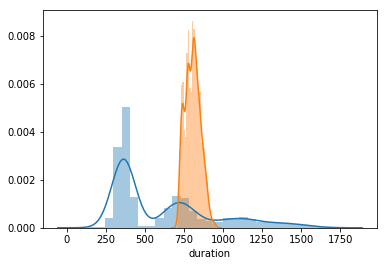

In [82]:
fig, ax = plt.subplots()
sns.distplot(X_test['duration'].loc[X_test['quit']==1],ax=ax)
sns.distplot(y_quit,ax=ax)
# Cox-whatever algo is anot an appropriate model to describe the churn here, as it is multiplicative. 
# We need to find a better model to explain this rather than cox-..